## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


No handles with labels found to put in legend.


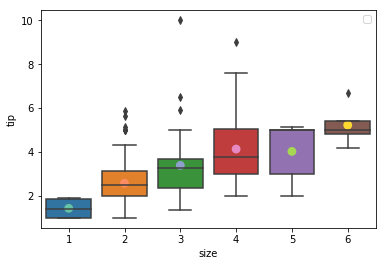

In [6]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [19]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


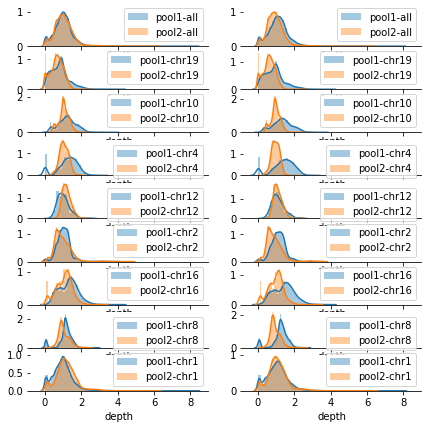

In [21]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)